In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from PIL import Image

In [2]:
DATA_DIR = Path("../data/raw/chest_xray")
CLASSES = ["NORMAL", "PNEUMONIA"]
SPLITS = ["train", "test", "val"]

## Class Distribution

/var/folders/5c/8j0jzx8d1jj25hvgcjf5jyl40000gp/T/ipykernel_57100/960708685.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


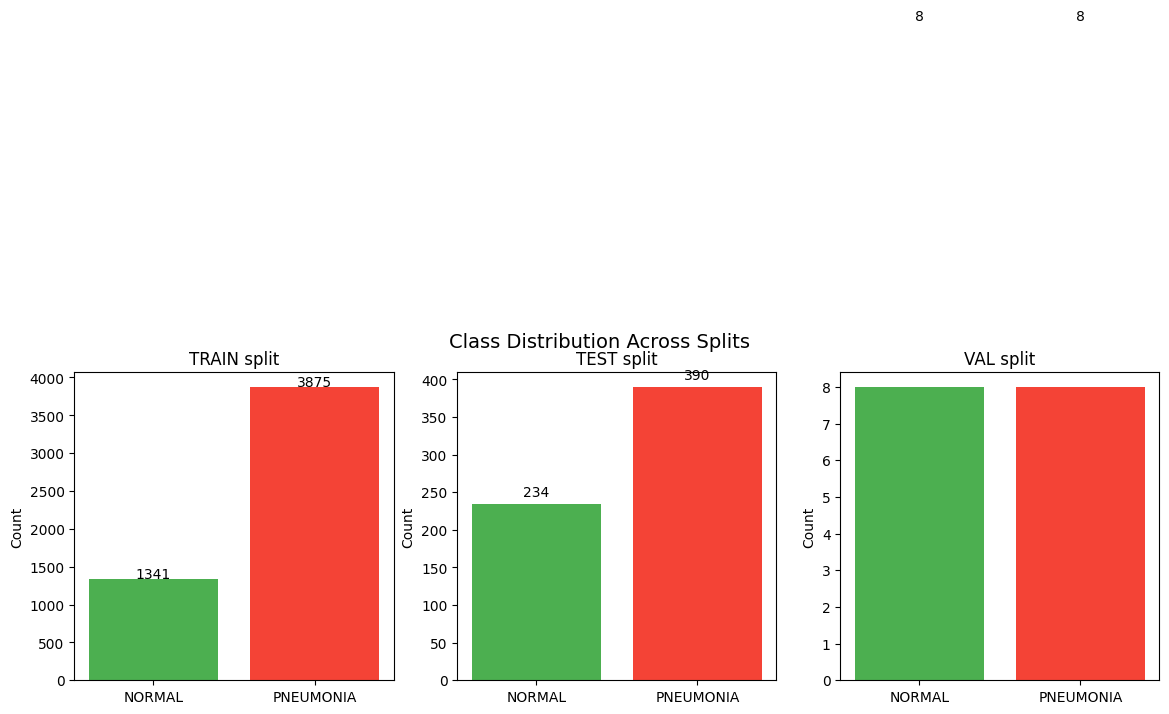

Counts:
  train: {'NORMAL': 1341, 'PNEUMONIA': 3875} (total: 5216)
  test: {'NORMAL': 234, 'PNEUMONIA': 390} (total: 624)
  val: {'NORMAL': 8, 'PNEUMONIA': 8} (total: 16)


In [3]:
counts = {}
for split in SPLITS:
    counts[split] = {}
    for cls in CLASSES:
        d = DATA_DIR / split / cls
        counts[split][cls] = len(list(d.glob("*"))) if d.exists() else 0

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax, split in zip(axes, SPLITS):
    vals = list(counts[split].values())
    bars = ax.bar(CLASSES, vals, color=["#4CAF50", "#F44336"])
    ax.set_title(f"{split.upper()} split")
    ax.set_ylabel("Count")
    for bar, v in zip(bars, vals):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, str(v), ha="center")
fig.suptitle("Class Distribution Across Splits", fontsize=14)
fig.tight_layout()
plt.show()

print("Counts:")
for split in SPLITS:
    total = sum(counts[split].values())
    print(f"  {split}: {counts[split]} (total: {total})")

## Sample Images

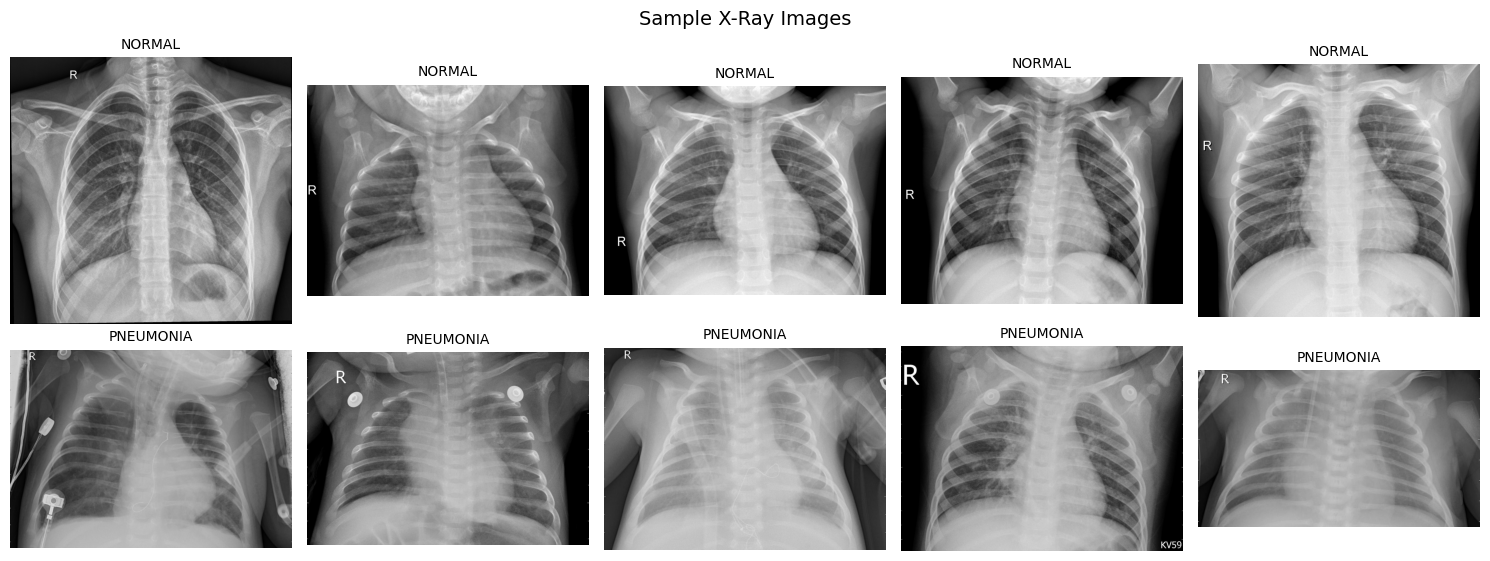

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for row, cls in enumerate(CLASSES):
    sample_dir = DATA_DIR / "train" / cls
    samples = list(sample_dir.glob("*"))[:5]
    for col, img_path in enumerate(samples):
        img = Image.open(img_path).convert("L")
        axes[row, col].imshow(img, cmap="gray")
        axes[row, col].set_title(cls, fontsize=10)
        axes[row, col].axis("off")
fig.suptitle("Sample X-Ray Images", fontsize=14)
fig.tight_layout()
plt.show()

## Image Size Distribution

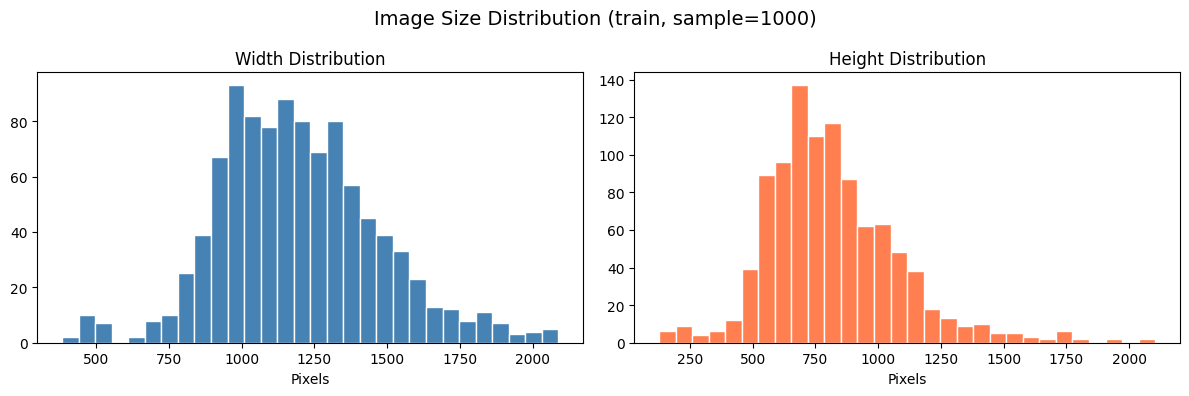

Width  — min: 384, max: 2088, mean: 1196
Height — min: 127, max: 2104, mean: 818


In [5]:
widths, heights = [], []
sample_paths = list((DATA_DIR / "train").rglob("*.*"))[:1000]
for p in sample_paths:
    try:
        w, h = Image.open(p).size
        widths.append(w)
        heights.append(h)
    except Exception:
        continue

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(widths, bins=30, color="steelblue", edgecolor="white")
axes[0].set_title("Width Distribution")
axes[0].set_xlabel("Pixels")
axes[1].hist(heights, bins=30, color="coral", edgecolor="white")
axes[1].set_title("Height Distribution")
axes[1].set_xlabel("Pixels")
fig.suptitle("Image Size Distribution (train, sample=1000)", fontsize=14)
fig.tight_layout()
plt.show()

print(f"Width  — min: {min(widths)}, max: {max(widths)}, mean: {np.mean(widths):.0f}")
print(f"Height — min: {min(heights)}, max: {max(heights)}, mean: {np.mean(heights):.0f}")

## Pixel Intensity Comparison

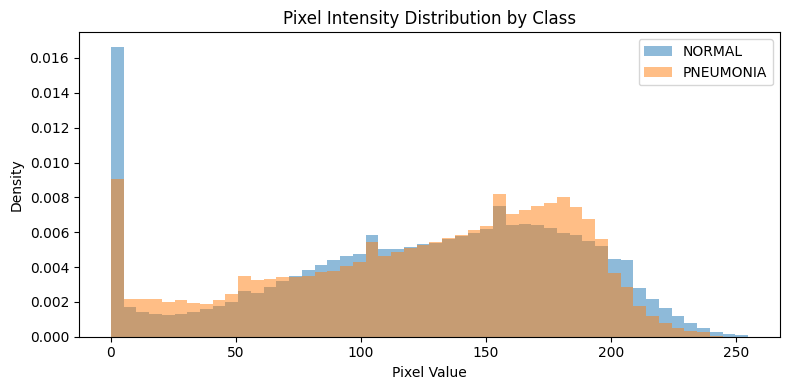

In [6]:
IMG_SIZE = 64

fig, ax = plt.subplots(figsize=(8, 4))
for cls in CLASSES:
    sample_paths = list((DATA_DIR / "train" / cls).glob("*"))[:200]
    pixels = []
    for p in sample_paths:
        try:
            img = np.array(Image.open(p).convert("L").resize((IMG_SIZE, IMG_SIZE)))
            pixels.extend(img.flatten().tolist())
        except Exception:
            continue
    ax.hist(pixels, bins=50, alpha=0.5, label=cls, density=True)

ax.set_title("Pixel Intensity Distribution by Class")
ax.set_xlabel("Pixel Value")
ax.set_ylabel("Density")
ax.legend()
fig.tight_layout()
plt.show()

## Mean Image per Class

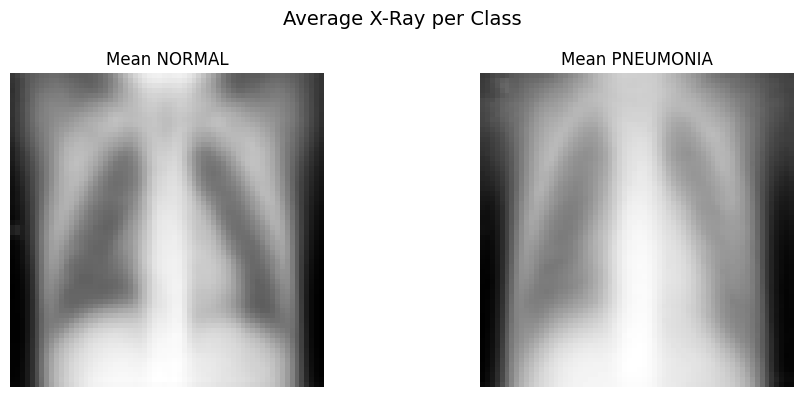

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, cls in zip(axes, CLASSES):
    sample_paths = list((DATA_DIR / "train" / cls).glob("*"))[:300]
    imgs = []
    for p in sample_paths:
        try:
            imgs.append(np.array(Image.open(p).convert("L").resize((IMG_SIZE, IMG_SIZE))))
        except Exception:
            continue
    mean_img = np.mean(imgs, axis=0)
    ax.imshow(mean_img, cmap="gray")
    ax.set_title(f"Mean {cls}")
    ax.axis("off")
fig.suptitle("Average X-Ray per Class", fontsize=14)
fig.tight_layout()
plt.show()